In [37]:
import pandas as pd

In [38]:
df=pd.read_csv('C:/Users/Administrator/Downloads/penguins.csv')

In [39]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [40]:
df['culmen_length_mm'].isnull().values.any()

True

In [41]:
df['culmen_length_mm']=df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())

In [42]:
df['culmen_depth_mm'].isnull().values.any()

True

In [43]:
df['culmen_depth_mm']=df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())

In [44]:
df['flipper_length_mm'].isnull().values.any()

True

In [45]:
df['flipper_length_mm']=df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())

In [46]:
df['body_mass_g'].isnull().values.any()

True

In [47]:
df['body_mass_g']=df['body_mass_g'].fillna(df['body_mass_g'].mean())

In [48]:
df.shape

(344, 5)

In [49]:
df=df.dropna()

In [50]:
df.shape

(335, 5)

In [51]:
df=df.drop_duplicates()

In [52]:
df.shape
import matplotlib.pyplot as plt

In [53]:
df_without_sex=df.drop('sex',axis=1)

<Axes: >

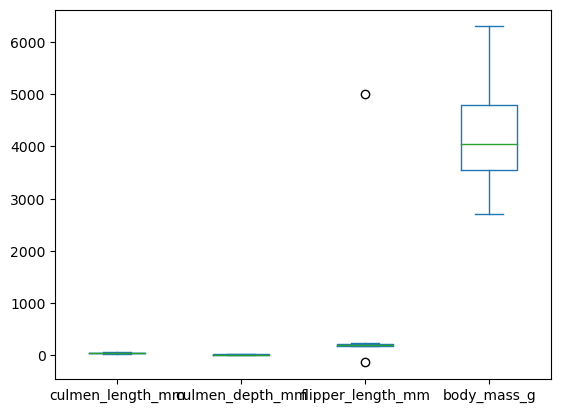

In [54]:
df_without_sex.plot(kind='box')

In [55]:
q1,q3=df['flipper_length_mm'].quantile([0.25,0.75])
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
indices=df[(df['flipper_length_mm']<lower_bound) | (df['flipper_length_mm']>upper_bound)].index

In [56]:
df=df.drop(indices,axis=0)

In [57]:
df.shape

(333, 5)

In [65]:
df['sex'].value_counts()
df['sex'].shape

(333,)

In [75]:
from sklearn.preprocessing import StandardScaler
df['sex'] = df['sex'].replace({'MALE': 0, 'FEMALE': 1})

In [76]:
x=df.drop('sex',axis=1)

In [77]:
y=df['sex']

In [78]:
scaler=StandardScaler()

In [80]:
x_scaled=scaler.fit_transform(x)

In [81]:
from sklearn.cluster import KMeans

In [82]:
kmeans=KMeans(n_clusters=2,random_state=42)

In [84]:
df['cluster']=kmeans.fit_predict(x_scaled)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [85]:
import seaborn as sns

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


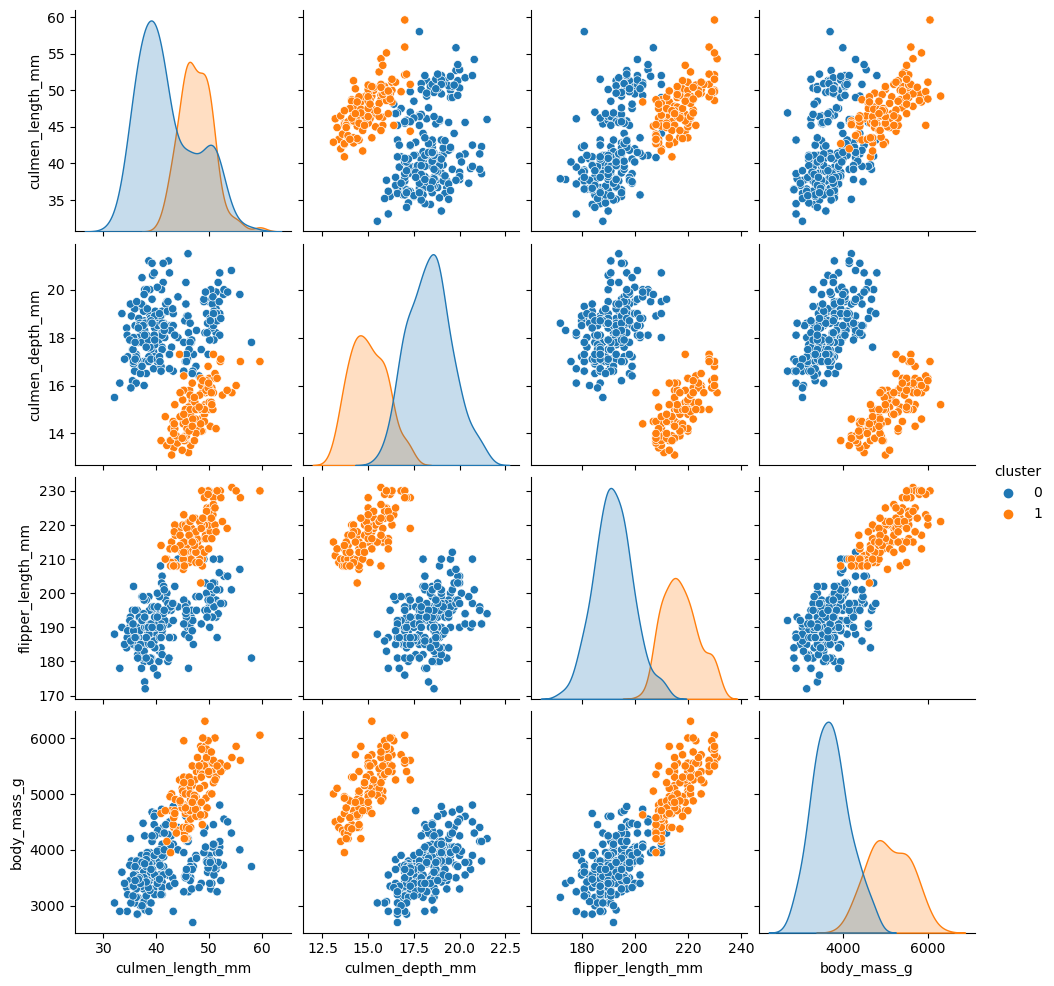

In [87]:
sns.pairplot(df,hue='cluster',vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])
plt.show()

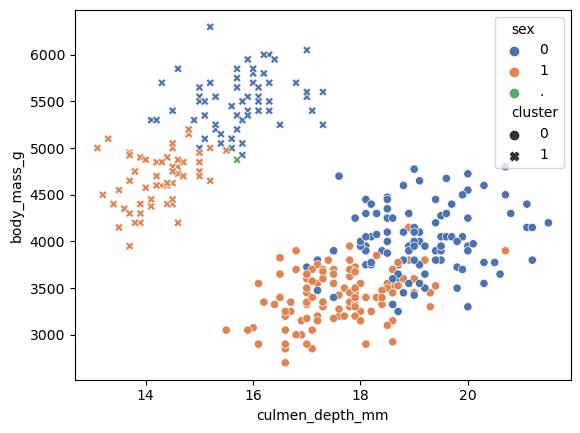

In [89]:
sns.scatterplot(data=df,x='culmen_depth_mm',y='body_mass_g',hue='sex',style='cluster',palette='deep')
plt.show()